<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>


# **Ïù¥Î≥ÄÎüâ Î∂ÑÏÑù ‚ë¢ - Î≤îÏ£ºÌòï  ‚Üí Î≤îÏ£ºÌòï**

- ÏãúÍ∞ÅÌôîÏôÄ ÏàòÏπòÌôî Î∞©Î≤ïÏúºÎ°ú Îëê Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌï©ÎãàÎã§.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/two_var_03.png' width=600 align='left'/>

<img src='https://raw.githubusercontent.com/Jangrae/img/master/analysis3.png' width=620 align='left'/>

## **1. ÌôòÍ≤ΩÏ§ÄÎπÑ**

- ÏÇ¨Ïö©Ìï† ÎùºÏù¥Î∏åÎü¨Î¶¨ÏôÄ Î∂ÑÏÑù ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥ÏòµÎãàÎã§.

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Titanic Îç∞Ïù¥ÌÑ∞
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.1.csv'
titanic = pd.read_csv(path)
titanic.head()

Survived  Pclass Title     Sex   Age     Fare Embarked AgeGroup  Family  \
0         0       3    Mr    male  22.0   7.2500        S   Age_20       2   
1         1       1   Mrs  female  38.0  71.2833        C   Age_30       2   
2         1       3  Miss  female  26.0   7.9250        S   Age_20       1   
3         1       1   Mrs  female  35.0  53.1000        S   Age_30       2   
4         0       3    Mr    male  35.0   8.0500        S   Age_30       1   

   Mother  
0       0  
1       0  
2       0  
3       0  
4       0

## **2. ÍµêÏ∞®Ìëú**

- Î≤îÏ£º vs Î≤îÏ£º Î•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî PandasÏùò **crosstab()** Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ **ÍµêÏ∞®Ìëú**Î•º Î®ºÏ†Ä ÎßåÎì§Ïñ¥Ïïº Ìï©ÎãàÎã§.
- **Sex ‚Üí Survived** Í¥ÄÍ≥ÑÎ•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ ÍµêÏ∞®ÌëúÎ•º ÎßåÎì§Ïñ¥Î¥ÖÎãàÎã§.

In [3]:
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived    0    1
Sex               
female     81  233
male      468  109

- Ï∞∏Í≥†Î°ú, ÏúÑ ÍµêÏ∞®ÌëúÎäî Îã§ÏùåÍ≥º Í∞ôÏù¥ groupby() Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©Ìï¥ ÏßëÍ≥ÑÌïú ÌõÑ pivot ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïú Í≤ÉÍ≥º Í∞ôÏäµÎãàÎã§.

In [4]:
tmp = titanic.groupby(by=['Sex', 'Survived'], as_index=False)['Fare'].count()
tmp.columns = ['Sex', 'Survived', 'Cnt']
tmp.pivot(index='Sex', columns='Survived', values='Cnt')

Survived    0    1
Sex               
female     81  233
male      468  109

- **Embarked ‚Üí Survived** Í¥ÄÍ≥ÑÎ•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ ÍµêÏ∞®ÌëúÎ•º ÎßåÎì§Ïñ¥Î¥ÖÎãàÎã§.

In [5]:
pd.crosstab(titanic['Embarked'], titanic['Survived'])

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219

- ÍµêÏ∞®ÌëúÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ **normalize** Îß§Í∞úÎ≥ÄÏàò Í∞íÏóê Îî∞Îùº Îã§Î•∏ Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
    - 'index': Í∞Å ÌñâÏùò Ìï©ÏúºÎ°ú Í∞Å ÏöîÏÜåÎ•º ÎÇòÎà†ÏÑú Í∞Å ÌñâÏùò ÏÉÅÎåÄÏ†ÅÏù∏ ÎπÑÏú®ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§(Í∞Å ÌñâÏùò Ìï©Ïù¥ 1Ïù¥ Îê®).
    - 'columns': Í∞Å Ïó¥Ïùò Ìï©ÏúºÎ°ú Í∞Å ÏöîÏÜåÎ•º ÎÇòÎà†ÏÑú Í∞Å Ïó¥Ïùò ÏÉÅÎåÄÏ†ÅÏù∏ ÎπÑÏú®ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§(Í∞Å Ïó¥Ïù¥ Ìï©Ïù¥ 1Ïù¥ Îê®).
    - 'all': Ï†ÑÏ≤¥ Ìï©ÏúºÎ°ú Í∞Å ÏöîÏÜåÎ•º ÎÇòÎà†ÏÑú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Í∞Å ÏÖÄÏùò ÏÉÅÎåÄÏ†ÅÏù∏ ÎπÑÏú®ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§(Ï†ÑÏ≤¥ Ìï©Ïù¥ 1Ïù¥ Îê®).

<img src='https://raw.githubusercontent.com/Jangrae/img/master/cross.png' width=700 align='left'/>


- **Embarked ‚Üí Survived** Í¥ÄÍ≥ÑÎ•º ÍµêÏ∞®ÌëúÎ°ú normalize Îß§Í∞úÎ≥ÄÏàò Í∞íÏùÑ Î∞îÍøîÍ∞ÄÎ©¥ÏÑú ÌëúÏãúÌï¥Î¥ÖÎãàÎã§.

In [18]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='columns')  # normalize => columnÏóêÏÑú Ï∞®ÏßÄÌïòÎäî ÎπÑÏú®

Survived         0         1
Embarked                    
C         0.136612  0.271930
Q         0.085610  0.087719
S         0.777778  0.640351

In [7]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')  # indexÍ∏∞Ï§ÄÏúºÎ°ú ÎπÑÏú®

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009

In [8]:
pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='all')  # Ï†ÑÏ≤¥ÏóêÏÑúÏùò ÎπÑÏú®

Survived         0         1
Embarked                    
C         0.084175  0.104377
Q         0.052750  0.033670
S         0.479237  0.245791

## **3. ÏãúÍ∞ÅÌôî**

- Îã§ÏùåÍ≥º Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú Î≤îÏ£ºÌòï ‚Üí Î≤îÏ£ºÌòï ÎπÑÍµêÎ•º ÏãúÍ∞ÅÌôîÌï† Ïàò ÏûàÏäµÎãàÎã§.
    -  100% Stacked Bar
    -  Mosaic Plot


- ÏúÑ Îëê Í∞ÄÏßÄ Î∞©Î≤ïÏúºÎ°ú **Pclass ‚Üí Survived** Í¥ÄÍ≥ÑÎ•º ÏãúÍ∞ÅÌôîÌï¥ÏÑú ÎπÑÍµêÌï¥ Î¥ÖÎãàÎã§.

**1) 100% Stacked Bar**

- Ïö∞ÏÑ† **normalize='index'** Î•º ÏÑ§Ï†ïÌïú ÍµêÏ∞®ÌëúÎ•º ÏûëÏÑ±Ìï©ÎãàÎã§.
- Pclass Î≥ÄÏàòÍ∞Ä ÏÑ∏ Í∞úÏùò Î≤îÏ§èÍ∞íÏùÑ Í∞ÄÏßÄÎØÄÎ°ú ÏÑ∏ Í∞úÏùò ÌñâÏù¥ ÏÉùÍπÅÎãàÎã§.
- normalize='index'Î•º ÏßÄÏ†ïÌñàÏúºÎØÄÎ°ú Í∞Å ÌñâÏùò Ìï©ÏùÄ 1Ïù¥ Îê©ÎãàÎã§.

In [9]:
table = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')
table

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363

- ÏúÑ ÍµêÏ∞®ÌëúÏóê ÎåÄÌï¥ Stacked BarÎ•º Í∑∏Î¶ΩÎãàÎã§.
- Stacked BarÎäî PandasÏùò **plot()** Î©îÏÜåÎìúÎ°ú ÏâΩÍ≤å Í∑∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§.
- Í∞Å ÌñâÎ≥ÑÎ°ú Stacked BarÍ∞Ä Í∑∏Î†§ÏßÄÎ©∞, Í∞Å ÌñâÏùò Ìï©Ïù¥ 1Ïù¥ÎØÄÎ°ú Í∞ôÏùÄ ÎÜíÏù¥Î•º Í∞ñÏäµÎãàÎã§.
- Í∑∏ÎûòÏÑú 100% Stacked Bar ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§.
- **axhline()** Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Survived Ïó¥ ÌèâÍ∑†ÏùÑ ÌëúÏãúÌïòÎäî Í∞ÄÎ°úÏÑ†ÎèÑ ÌëúÏãúÌï¥Î¥ÖÎãàÎã§.
- Survived Ïó¥ ÌèâÍ∑†, Ï¶â titanic['Survived'].mean() ÏùÄ ÏÉùÏ°¥Ïú®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
- Í∑∏Îü∞Îç∞ Stacked Bar ÌïòÎã®Ïù¥ ÏÇ¨Îßù(Survived=0)ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
- Í∑∏ÎûòÏÑú ÏùºÍ¥ÄÎêú ÌëúÏãúÎ•º ÏúÑÌï¥ 1 - titanic['Survived'].mean() ÏùÑ ÌëúÏãúÌï©ÎãàÎã§.

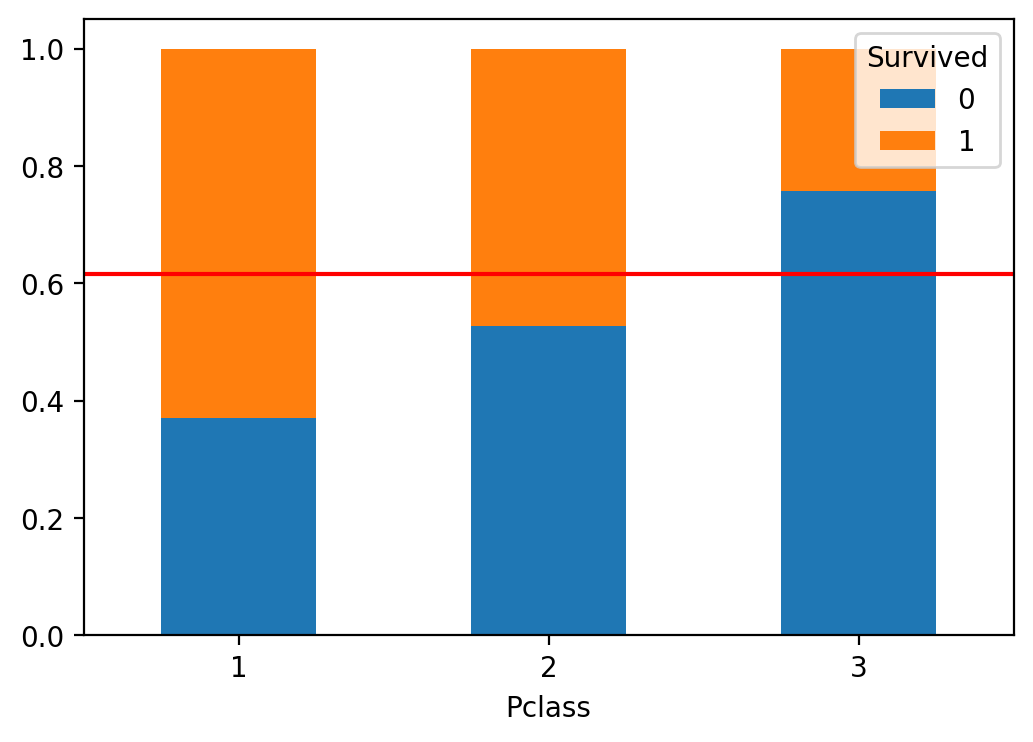

In [10]:
table.plot(kind='bar', stacked=True)

plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908

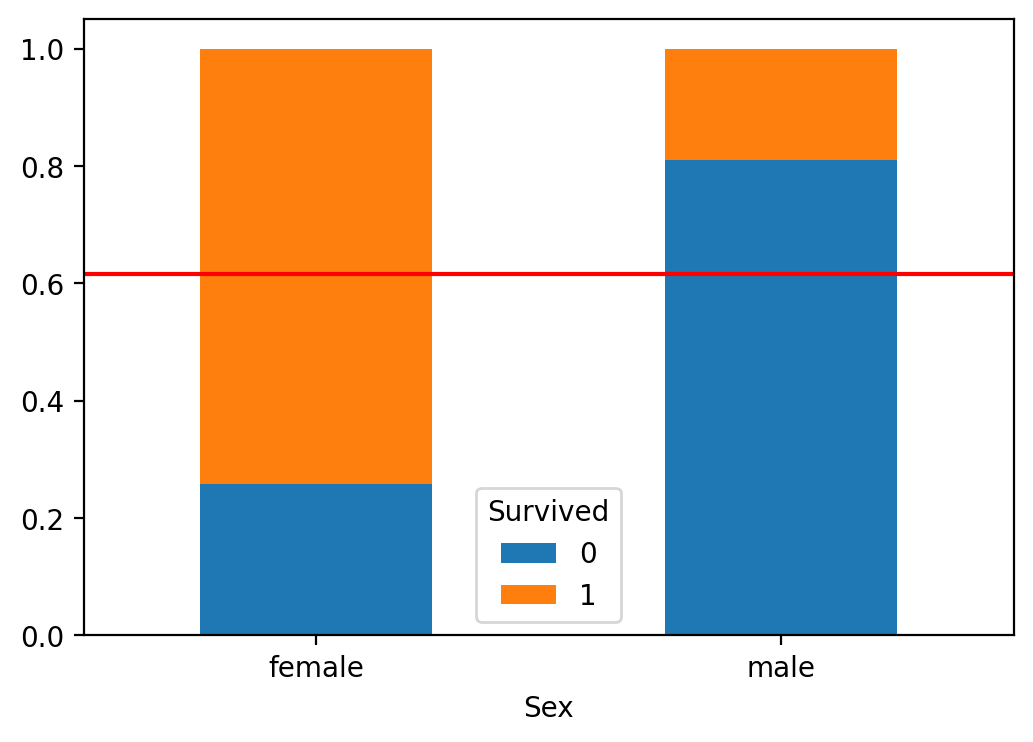

In [11]:
table = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.660991  0.339009

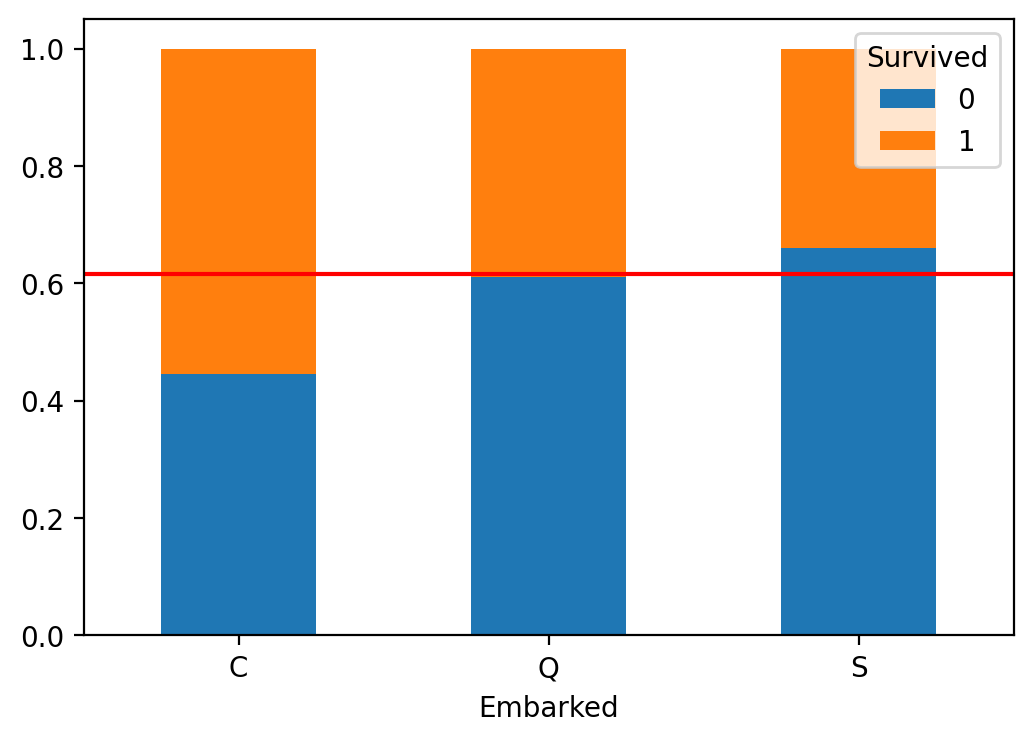

In [12]:
table = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=0)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

titanic Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Îã§Ïùå Î≥ÄÏàòÎì§ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º 100% Bar Plot ÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

**1Ô∏è‚É£ Title ‚Üí Survived**

Survived         0         1
Title                       
Master    0.439024  0.560976
Miss      0.297297  0.702703
Mr        0.839388  0.160612
Mrs       0.203125  0.796875
Others    0.785714  0.214286

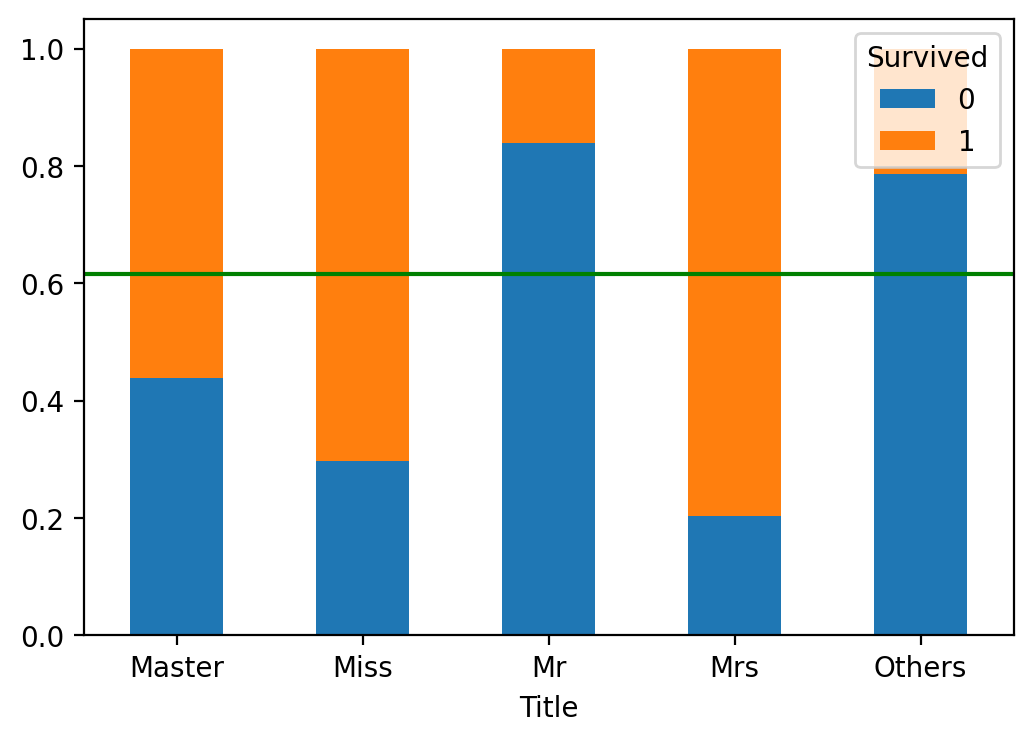

In [20]:
table = pd.crosstab(titanic['Title'], titanic['Survived'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='g')
plt.xticks(rotation=0)
plt.show()

**2Ô∏è‚É£ AgeGroup ‚Üí Survived**

Survived         0         1
AgeGroup                    
Age_00    0.393939  0.606061
Age_10    0.598039  0.401961
Age_20    0.613281  0.386719
Age_30    0.666667  0.333333
Age_40    0.622222  0.377778
Age_50    0.583333  0.416667
Age_60    0.684211  0.315789
Age_70    1.000000  0.000000
Age_80    0.000000  1.000000

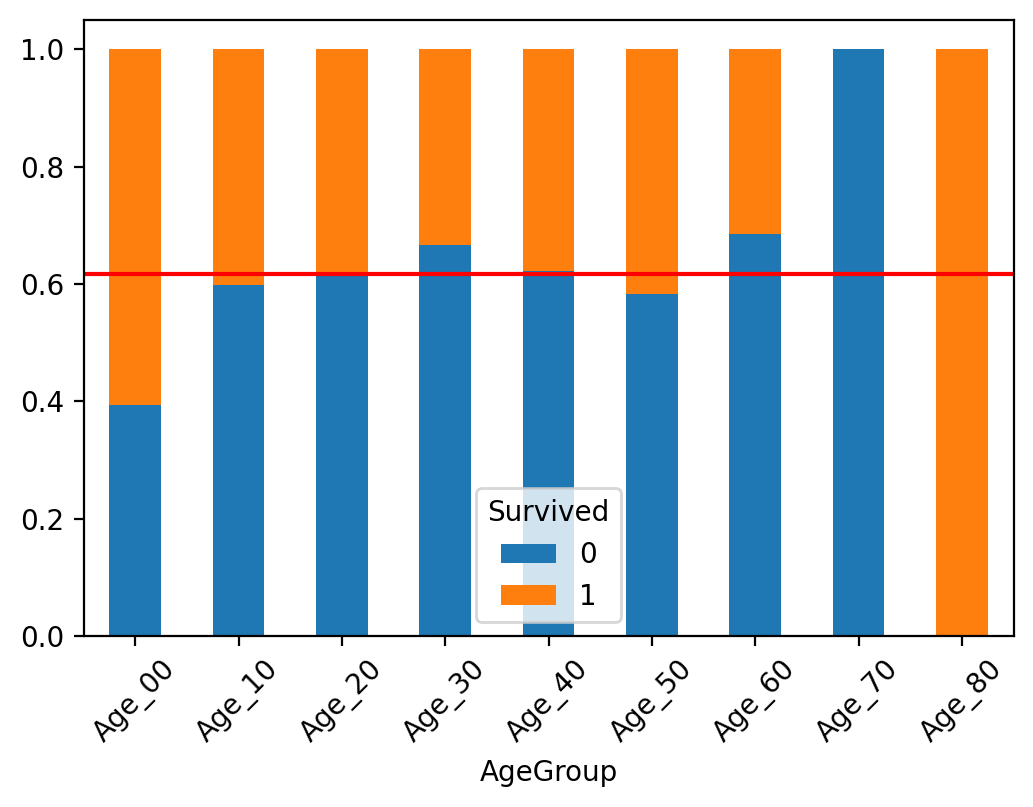

In [22]:
table = pd.crosstab(titanic['AgeGroup'], titanic['Survived'], normalize='index')
display(table)

table.plot(kind='bar', stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.xticks(rotation=45)
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

**2) Mosaic Plot**

- 100% Stacked BarÎäî ÎπÑÏú®Îßå ÎπÑÍµêÌïòÎØÄÎ°ú ÏñëÏóê ÎåÄÌïú ÎπÑÍµêÎäî Ìï† Ïàò ÏóÜÏäµÎãàÎã§.
- Mosaic PlotÏúºÎ°ú **ÏñëÏóê ÎåÄÌïú ÎπÑÍµê**Î•º Ìï¥Î¥ÖÎãàÎã§.
- **tatsmodels.graphics.mosaicplot**Ïùò **mosaic()** Ìï®ÏàòÎ°ú Mosaic PlotÏùÑ Í∑∏Î¶ΩÎãàÎã§.

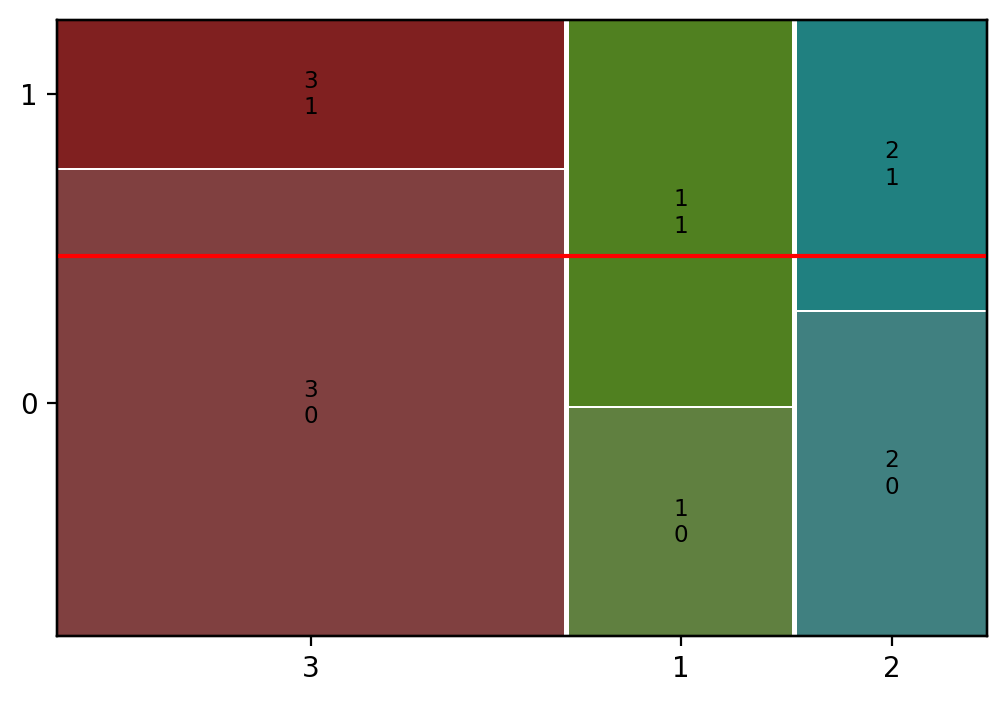

In [13]:
mosaic(titanic, ['Pclass', 'Survived'])
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

- ÏúÑ Í∑∏ÎûòÌîÑÏùò xÏ∂ï Í∏∏Ïù¥Îäî Í∞Å Í∞ùÏã§ Îì±Í∏âÎ≥Ñ ÏäπÍ∞ù ÎπÑÏú®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.  
- yÏ∂ï Í∏∏Ïù¥Îäî Í∞ùÏã§ ÏäπÍ∞ùÏùò ÏÇ¨Îßù, ÏÉùÏ°¥ ÎπÑÏú®ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
- **sort_values()** Î©îÏÜåÎìúÎ•º ÏÇ¨Ïö©Ìï¥ ÏõêÌïòÎäî ÏàúÏÑúÎ°ú Ï†ïÎ†¨Ìï¥ ÌëúÏãúÌï† Ïàò ÏûàÏäµÎãàÎã§.
- **gap** ÏòµÏÖòÏúºÎ°ú ÏòÅÏó≠Îì§ ÏÇ¨Ïù¥ Í∞ÑÍ≤©ÏùÑ Ï°∞Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.

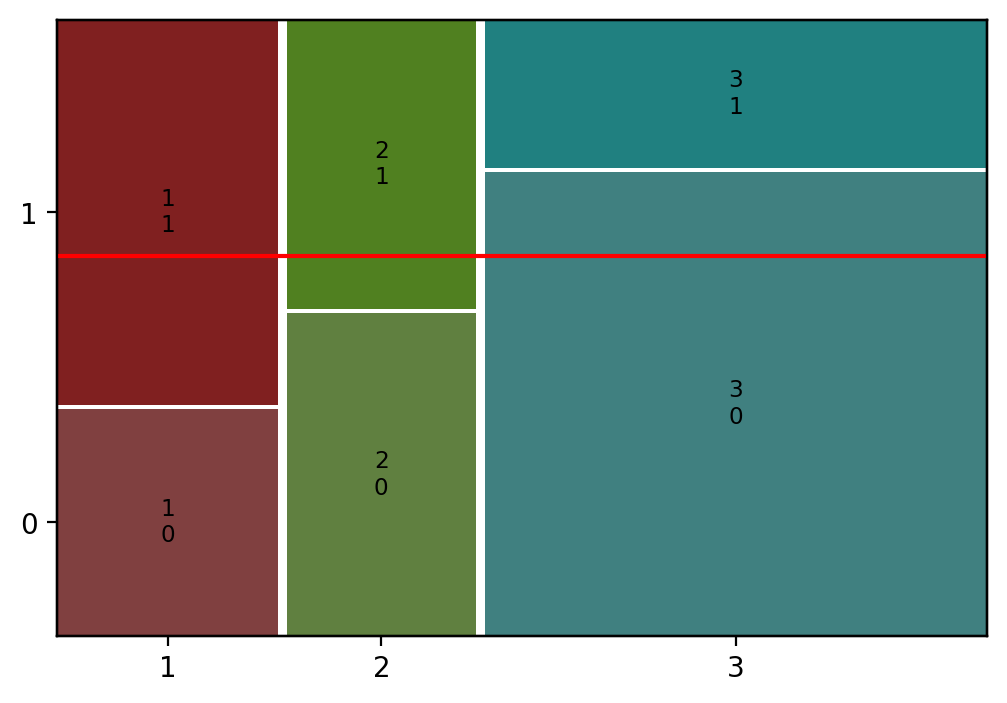

In [23]:
mosaic(titanic.sort_values(['Pclass', 'Survived']), ['Pclass', 'Survived'], gap=0.01)  # sort_valuesÎ•º ÌÜµÌï¥ Ï†ïÎ†¨Îêú Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

titanic Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Îã§Ïùå Î≥ÄÏàòÎì§ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Mosaic Plot ÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ ÌôïÏù∏ÌïòÏÑ∏Ïöî.

**1Ô∏è‚É£ Sex ‚Üí Survived**

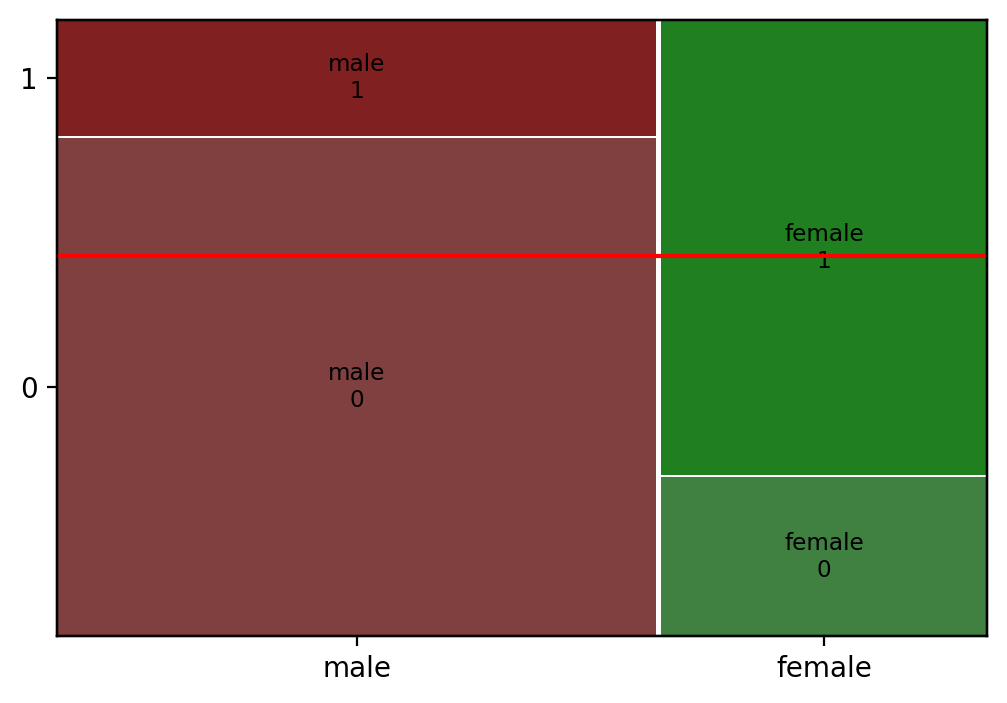

In [24]:
mosaic(titanic, ['Sex', 'Survived'])
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

**2Ô∏è‚É£ Embarked ‚Üí Survived**

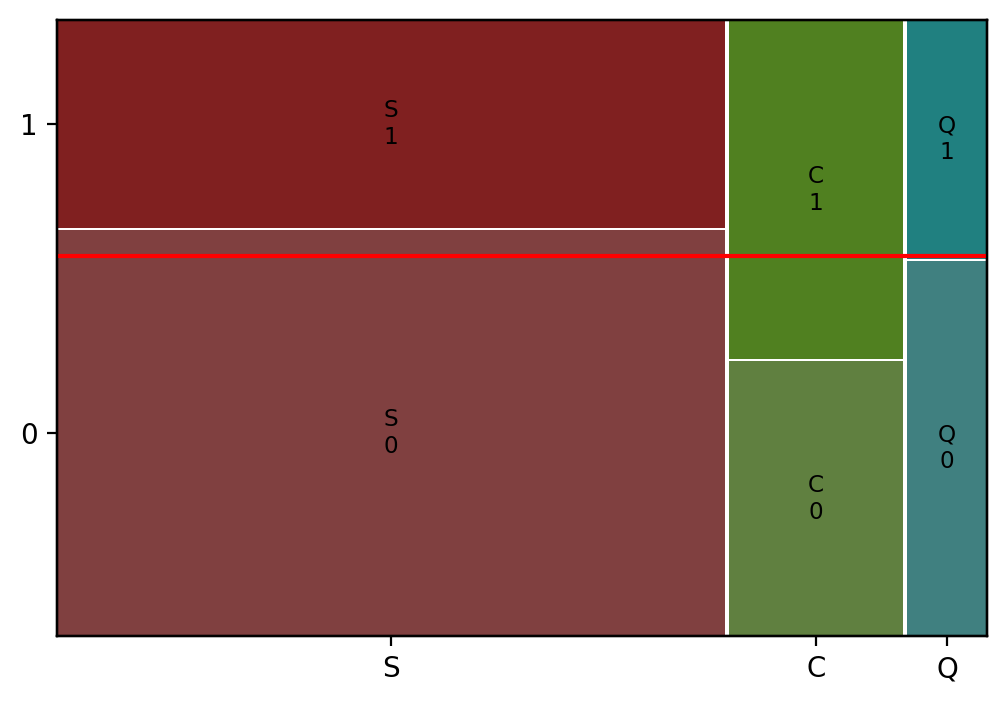

In [25]:
mosaic(titanic, ['Embarked', 'Survived'])
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

**3Ô∏è‚É£ Title ‚Üí Survived**

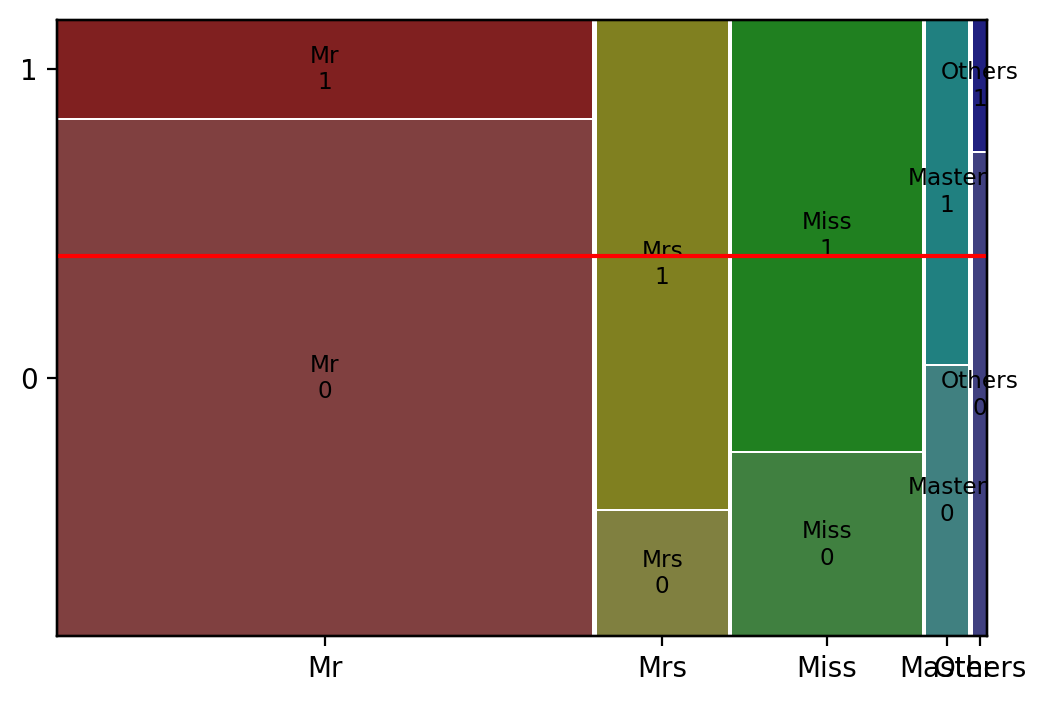

In [28]:
mosaic(titanic, ['Title', 'Survived'])#, label_rotation=(90,0))
plt.axhline(1-titanic['Survived'].mean(), color='r')
plt.show()

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

**üìå ÏãúÍ∞ÅÌôî Í≤∞Í≥ºÎ•º Î∂ÑÏÑùÌïòÎäî Î∞©Î≤ï**

- Ìïú Í∞ÄÏßÄÎßå Í∏∞ÏñµÌïòÏÑ∏Ïöî! Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Ï∞∏Ïùº Îïå ÎÇòÏò¨ Í∑∏ÎûòÌîÑÏùò Î™®Ïñë(ÏïÑÎûò Í∑∏Î¶º)
- Ïó¨Í∏∞ÏÑú Î≤óÏñ¥ÎÇòÎ©¥, 'Ï∞®Ïù¥Í∞Ä ÏûàÎã§'., 'Í¥ÄÎ†®Ïù¥ ÏûàÎã§'Îäî ÎßêÏûÖÎãàÎã§.



<img src='https://github.com/DA4BAM/image/blob/main/%EB%AA%A8%EC%9E%90%EC%9D%B5.png?raw=true' width=700/>

**Ï∞∏Í≥†:  Mosaic PlotÏùÑ 3 Î≤îÏ£ºÎ°ú Í∑∏Î¶¨Í∏∞**

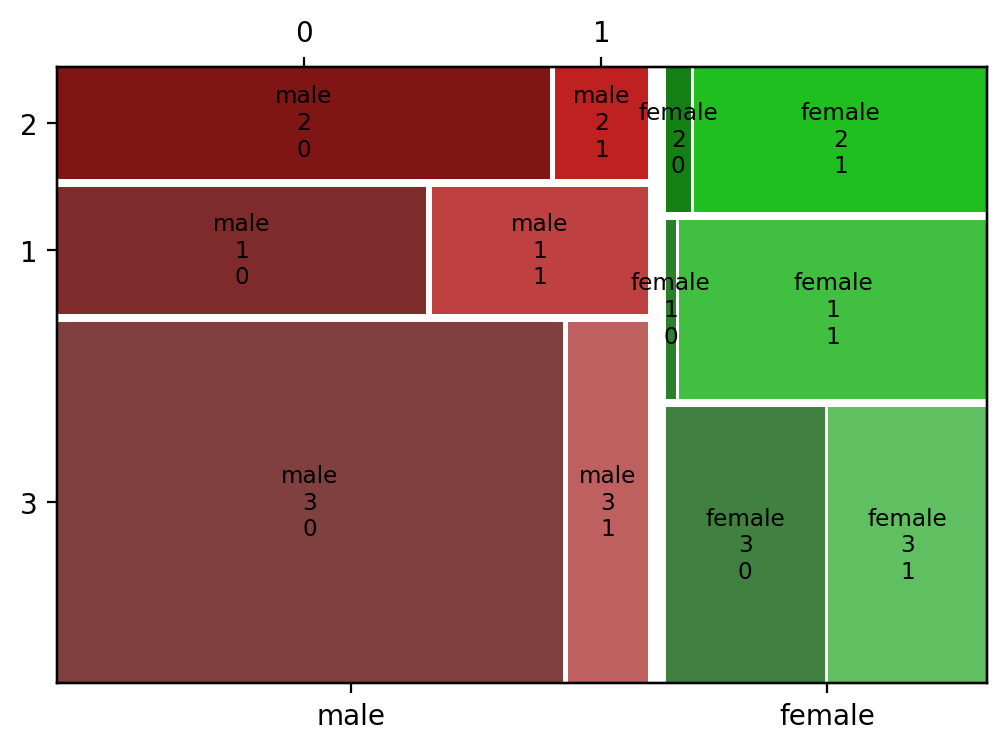

In [15]:
mosaic(titanic, ['Sex', 'Pclass', 'Survived'], gap=0.02)
plt.show()

## **4. ÏàòÏπòÌôî**

- Î≤îÏ£ºÌòï ‚Üí Î≤îÏ£ºÌòï Í¥ÄÍ≥ÑÎ•º ÏàòÏπòÏôÄÌï¥ ÎπÑÍµêÌï† ÎïåÎäî **Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ï(Chi-Squared Test)** ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
- **scipy.stats** ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò **chi2_contingency()** Ìï®ÏàòÎ°ú Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
- Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏùÄ $x^2$Í≤ÄÏ†ïÏúºÎ°úÎèÑ Î∂àÎ¶ΩÎãàÎã§.

<img src = "https://github.com/Jangrae/img/blob/master/chi2.png?raw=true" width=300 align="left"/>

- Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâÏùÄ
    - ÌÅ¥ÏàòÎ°ù Í∏∞ÎåÄÎπàÎèÑÎ°úÎ∂ÄÌÑ∞ Ïã§Ï†ú Í∞íÏùò Ï∞®Ïù¥Í∞Ä ÌÅ¨Îã§Îäî ÏùòÎØ∏ÏûÖÎãàÎã§.
    - Í≥ÑÏÇ∞ÏãùÏúºÎ°ú Î≥º Îïå, Î≤îÏ£ºÏùò ÏàòÍ∞Ä ÎäòÏñ¥ÎÇ† ÏàòÎ°ù Í∞íÏùÄ Ïª§ÏßÄÍ≤å ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
    - Î≥¥ÌÜµ, ÏûêÏú†ÎèÑÏùò 2~3Î∞∞ Î≥¥Îã§ ÌÅ¨Î©¥, Ï∞®Ïù¥Í∞Ä ÏûàÎã§Í≥† Î¥ÖÎãàÎã§.

- Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏûêÏú†ÎèÑ: Î≤îÏ£ºÏùò Ïàò - 1

- Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏóêÏÑúÎäî
    - x Î≥ÄÏàòÏùò ÏûêÏú†ÎèÑ √ó y Î≥ÄÏàòÏùò ÏûêÏú†ÎèÑ
    - Ïòà: Pclass ‚Üí Survived
        - Pclass: Î≤îÏ£ºÍ∞Ä 3Í∞ú, Survived: 2Í∞ú
        - (3-1) * (2-1) = 2
        - Í∑∏Îü¨ÎØÄÎ°ú, 2Ïùò 2 ~ 3Î∞∞Ïù∏ 4 ~ 6 Î≥¥Îã§ Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâÏù¥ ÌÅ¨Î©¥ Ï∞®Ïù¥Í∞Ä ÏûàÎã§Í≥† Î≥ºÏàò ÏûàÏäµÎãàÎã§.


- **Pclass ‚Üí Survived** Í¥ÄÍ≥ÑÎ•º Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏùÑ ÏÇ¨Ïö©Ìï¥ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.
- Ïö∞ÏÑ† ÍµêÏ∞®ÌëúÎ•º ÎßåÎì§Í≥† ÌôïÏù∏Ìï©ÎãàÎã§.

In [16]:
table = pd.crosstab(titanic['Pclass'], titanic['Survived'])
table

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

- Ïù¥ ÍµêÏ∞®ÌëúÎ•º ÏÇ¨Ïö©Ìï¥ Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

In [31]:
result = spst.chi2_contingency(table)
print('* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ:', result[0])
print('* p-value:', result[1])
print('* Í∏∞ÎåÄÎπàÎèÑ:\n',result[3])
print('='*28)
print(result)  # dof Í∞Ä ÏûêÏú†ÎèÑ => 8 * (2~3) Î≥¥Îã§ ÌÅ¨Î©¥ ...Î≠ê?

* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ: 2.3248208157213828
* p-value: 0.9693999217950655
* Í∏∞ÎåÄÎπàÎèÑ:
 [[0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]
 [0.5735214 0.4264786]]
Chi2ContingencyResult(statistic=2.3248208157213828, pvalue=0.9693999217950655, dof=8, expected_freq=array([[0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786],
       [0.5735214, 0.4264786]]))


<img src = "https://github.com/Jangrae/img/blob/master/chi.png?raw=true" width=800 align="left"/>

üìå **Í∏∞ÎåÄÎπàÎèÑ Í≥ÑÏÇ∞**

**1)** $\frac{549 \times 216}{891}$
**2)** $\frac{549 \times 184}{891}$
**3)** $\frac{549 \times 491}{891}$
**4)** $\frac{342 \times 216}{891}$
**5)** $\frac{342 \times 184}{891}$
**6)** $\frac{342 \times 491}{891}$



üìå **Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞**

$\large x^2$$=\frac{(80-133.0909)^2}{133.0909}+\frac{(97-113.3737)^2}{113.3737}+\frac{(372-302.5354)^2}{302.5354}+\frac{(136-82.90909)^2}{82.90909}+\frac{(87-70.62626)^2}{70.62626}+\frac{(119-188.4646)^2}{188.4646}=102.889$

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

titanic Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Îã§Ïùå Î≥ÄÏàòÎì§ Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏúºÎ°ú ÌôïÏù∏ÌïòÏÑ∏Ïöî.

**1Ô∏è‚É£ Sex ‚Üí Survived**

In [32]:
table = pd.crosstab(titanic['Sex'], titanic['Survived'])
table

Survived    0    1
Sex               
female     81  233
male      468  109

In [40]:
result = spst.chi2_contingency(table)
print('* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ:', result[0])
print('* p-value:', result[1])
print('* ÏûêÏú†ÎèÑ:', result[2])
print('* Í∏∞ÎåÄÎπàÎèÑ:\n',result[3])
print('='*28)
print(result) 

* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ: 289.1953165452417
* p-value: 2.318405007221846e-61
* ÏûêÏú†ÎèÑ: 4
* Í∏∞ÎåÄÎπàÎèÑ:
 [[ 25.26262626  15.73737374]
 [113.98989899  71.01010101]
 [322.25252525 200.74747475]
 [ 78.86868687  49.13131313]
 [  8.62626263   5.37373737]]
Chi2ContingencyResult(statistic=289.1953165452417, pvalue=2.318405007221846e-61, dof=4, expected_freq=array([[ 25.26262626,  15.73737374],
       [113.98989899,  71.01010101],
       [322.25252525, 200.74747475],
       [ 78.86868687,  49.13131313],
       [  8.62626263,   5.37373737]]))


**2Ô∏è‚É£ Embarked ‚Üí Survived**

In [34]:
table = pd.crosstab(titanic['Embarked'], titanic['Survived'])
table

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219

In [39]:
result = spst.chi2_contingency(table)
print('* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ:', result[0])
print('* p-value:', result[1])
print('* ÏûêÏú†ÎèÑ:', result[2])
print('* Í∏∞ÎåÄÎπàÎèÑ:\n',result[3])
print('='*28)
print(result) 

* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ: 289.1953165452417
* p-value: 2.318405007221846e-61
* ÏûêÏú†ÎèÑ: 4
* Í∏∞ÎåÄÎπàÎèÑ:
 [[ 25.26262626  15.73737374]
 [113.98989899  71.01010101]
 [322.25252525 200.74747475]
 [ 78.86868687  49.13131313]
 [  8.62626263   5.37373737]]
Chi2ContingencyResult(statistic=289.1953165452417, pvalue=2.318405007221846e-61, dof=4, expected_freq=array([[ 25.26262626,  15.73737374],
       [113.98989899,  71.01010101],
       [322.25252525, 200.74747475],
       [ 78.86868687,  49.13131313],
       [  8.62626263,   5.37373737]]))


**3Ô∏è‚É£ Title ‚Üí Survived**

In [36]:
table = pd.crosstab(titanic['Title'], titanic['Survived'])
table

Survived    0    1
Title             
Master     18   23
Miss       55  130
Mr        439   84
Mrs        26  102
Others     11    3

In [38]:
result = spst.chi2_contingency(table)
print('* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ:', result[0])
print('* p-value:', result[1])
print('* ÏûêÏú†ÎèÑ:', result[2])
print('* Í∏∞ÎåÄÎπàÎèÑ:\n',result[3])
print('='*28)
print(result) 

* Ïπ¥Ïù¥Ï†úÍ≥±ÌÜµÍ≥ÑÎüâ: 289.1953165452417
* p-value: 2.318405007221846e-61
* ÏûêÏú†ÎèÑ: 4
* Í∏∞ÎåÄÎπàÎèÑ:
 [[ 25.26262626  15.73737374]
 [113.98989899  71.01010101]
 [322.25252525 200.74747475]
 [ 78.86868687  49.13131313]
 [  8.62626263   5.37373737]]
Chi2ContingencyResult(statistic=289.1953165452417, pvalue=2.318405007221846e-61, dof=4, expected_freq=array([[ 25.26262626,  15.73737374],
       [113.98989899,  71.01010101],
       [322.25252525, 200.74747475],
       [ 78.86868687,  49.13131313],
       [  8.62626263,   5.37373737]]))


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>